In [ ]:
import requests
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# API setup
api_key = ""
job_search = "https://api.adzuna.com/v1/api/jobs/gb/search/1"

params = {
    'app_id': '',
    'app_key': api_key,
    'results_per_page': 500,  
    'what': 'Software development AND Web development',
}

result = requests.get(job_search, params=params)

# Check if the request was successful
if result.status_code == 200:
    data = result.json()
    jobs = data.get('results', [])

    # Extract required data
    job_list = []
    for job in jobs:
        title = job.get('title', 'N/A')
        location = job.get('location', {}).get('display_name', 'N/A')
        company = job.get('company', {}).get('display_name', 'N/A')
        salary_min = job.get('salary_min', None)
        salary_max = job.get('salary_max', None)
        description = job.get('description','Not Available')

        # Calculate average salary if possible
        if salary_min and salary_max:
            salary = (salary_min + salary_max) / 2
        elif salary_min:
            salary = salary_min
        elif salary_max:
            salary = salary_max
        else:
            salary = None

        job_list.append([title, location, company, salary, description])

    # Convert to DataFrame
    df = pd.DataFrame(job_list, columns=["Job Title", "Location", "Company", "Salary", "Description"])
    df = df.dropna()  # Remove entries with missing salary

print(tabulate(df, headers='keys', tablefmt='grid'))

In [ ]:
# Extract skills 
from tabulate import tabulate

# Define a list of common IT skills to search for in job descriptions
skills_list = ["Python", "Java", "SQL", "Cloud Computing", "Machine Learning", "Cybersecurity", 
               "Data Analysis", "JavaScript", "DevOps", "Networking", "Linux", "Docker", "Kubernetes",
               "AWS", "Azure", "Agile", "Scrum", "C++", "React", "Django", "Flask", "TensorFlow", "Pandas",
               "AI", "Data Science", "Security", "Software Development", "Full Stack", "Back-end", 
               "Front-end", "Database", "System Administration", "Automation", "Big Data", "Microservices"]

# Function to extract skills from job descriptions
def extract_skills(description):
    if pd.isna(description):  # Handle missing descriptions
        return ["Not Available"]
    found_skills = [skill for skill in skills_list if skill.lower() in description.lower()]
    return found_skills if found_skills else ["Not Available"]

# Apply skill extraction function to all job descriptions
df["Required Skills"] = df["Description"].apply(extract_skills)

# Select relevant columns for the table using .loc (avoiding warning)
jobs_with_skills = df.loc[:, ["Job Title", "Location", "Salary", "Required Skills"]].copy()

# Convert "Required Skills" from list to string safely
jobs_with_skills.loc[:, "Required Skills"] = jobs_with_skills["Required Skills"].apply(lambda x: ", ".join(x))

# Display the full table without truncation
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.width", 1000)  # Prevent line wrapping

# Print table
print(tabulate(jobs_with_skills, headers="keys", tablefmt="grid"))

+----+------------------------------------------------+-------------------------------+----------+
|    | Job Title                                      | Location                      |   Salary |
+====+================================================+===============================+==========+
| 19 | Senior Lead Security Engineer                  | Glasgow City Centre, Glasgow  |  66938   |
+----+------------------------------------------------+-------------------------------+----------+
| 11 | Lead Front-End JavaScript Developer            | Pampisford, Cambridge         |  65000   |
+----+------------------------------------------------+-------------------------------+----------+
| 14 | PHP/ SQL Web Developer (Renewable Engineering) | Stockport, Greater Manchester |  60000   |
+----+------------------------------------------------+-------------------------------+----------+
| 17 | Front End Developer                            | Tamworth, Staffordshire       |  60000   |
+----+----

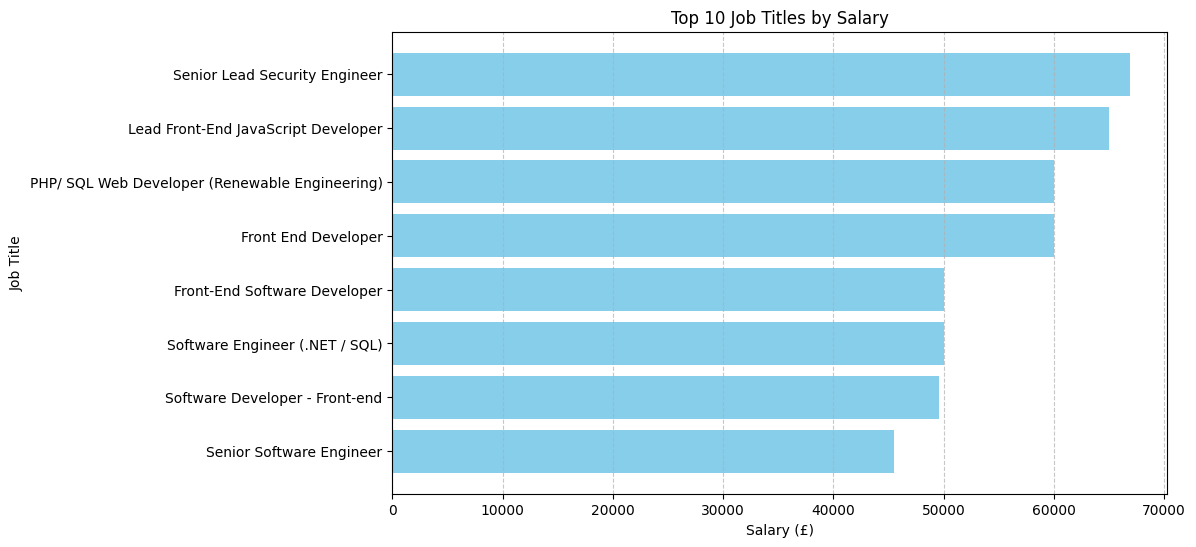

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Ensure salary is numeric (handle missing values)
df["Salary"] = pd.to_numeric(df["Salary"], errors="coerce")  # Convert to numeric, force errors to NaN

# Drop rows where salary is NaN
df_clean = df.dropna(subset=["Salary"])

# Get top 10 jobs based on salary
top_10_jobs = df_clean.nlargest(10, "Salary")[["Job Title", "Location", "Salary"]]

# Display as table
table = tabulate(top_10_jobs, headers="keys", tablefmt="grid")
print(table)

# Plot top 10 jobs based on salary
plt.figure(figsize=(10, 6))
plt.barh(top_10_jobs["Job Title"], top_10_jobs["Salary"], color="skyblue")
plt.xlabel("Salary (£)")
plt.ylabel("Job Title")
plt.title("Top 10 Job Titles by Salary")
plt.gca().invert_yaxis()  # Invert to show highest salary at the top
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

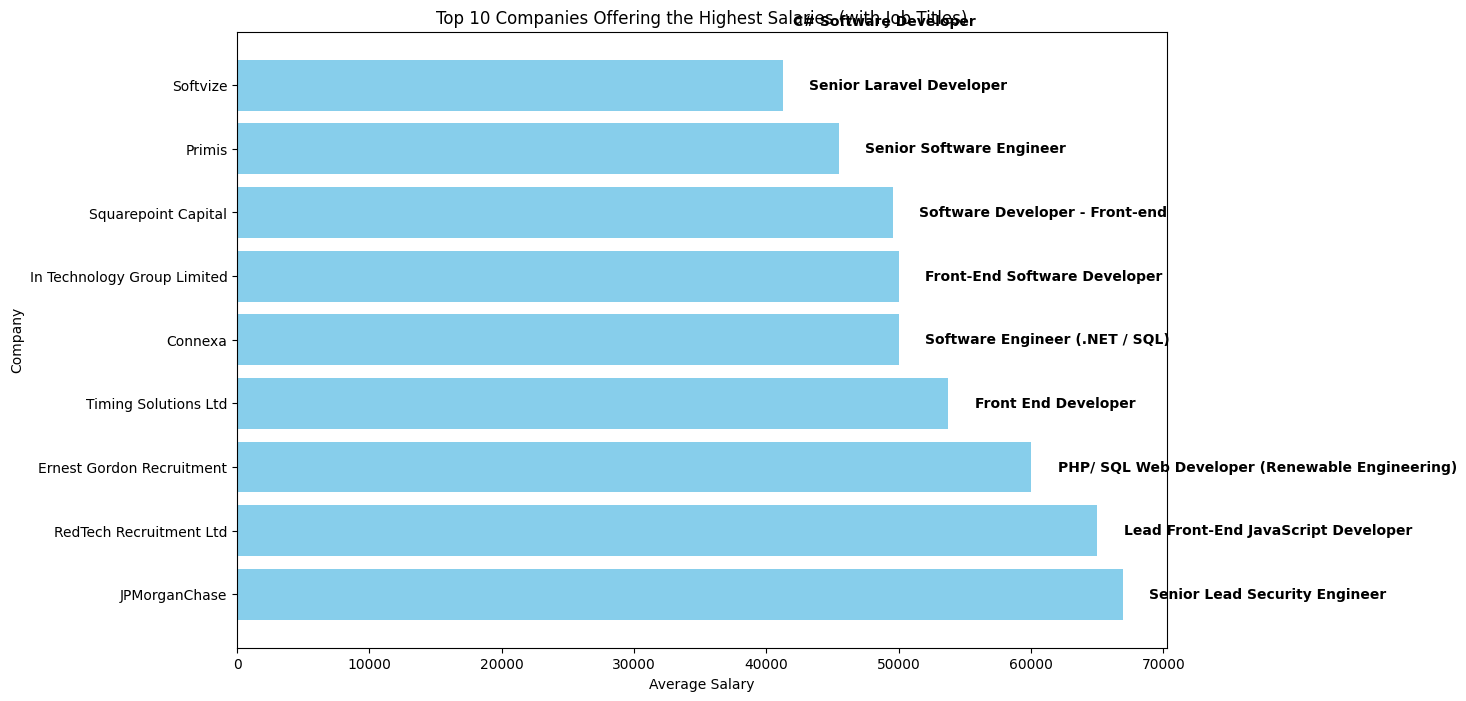

In [23]:

# Filter the top 10 companies offering the highest average salaries
top_companies = df.groupby('Company').agg({'Salary': 'mean'}).sort_values(by='Salary', ascending=False).head(10)

# Merge with job title to display the associated titles
top_companies_with_titles = df[df['Company'].isin(top_companies.index)][['Company', 'Salary', 'Job Title']]

# Create a plot
plt.figure(figsize=(12, 8))
top_companies_with_titles_grouped = top_companies_with_titles.groupby(['Company', 'Job Title']).agg({'Salary': 'mean'}).reset_index()
top_companies_with_titles_grouped = top_companies_with_titles_grouped.sort_values(by='Salary', ascending=False).head(10)

plt.barh(top_companies_with_titles_grouped['Company'], top_companies_with_titles_grouped['Salary'], color='skyblue')
for i, (salary, title) in enumerate(zip(top_companies_with_titles_grouped['Salary'], top_companies_with_titles_grouped['Job Title'])):
    plt.text(salary + 2000, i, title, va='center', color='black', fontweight='bold')

plt.xlabel('Average Salary')
plt.ylabel('Company')
plt.title('Top 10 Companies Offering the Highest Salaries (with Job Titles)')
plt.show()
